In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_69 = pd.read_csv('data/44Ca_159Tb_203At_xn_IFUS10_barfac0.69_sigr3.2.dat', sep='\t')
df_70 = pd.read_csv('data/44Ca_159Tb_203At_xn_IFUS10_barfac0.70_sigr3.2.dat', sep='\t')
df_68 = pd.read_csv('data/44Ca_159Tb_203At_xn_IFUS10_barfac0.68_sigr3.2.dat', sep='\t')
df_71 = pd.read_csv('data/44Ca_159Tb_203At_xn_IFUS10_barfac0.71_sigr3.2.dat', sep='\t')
df_67 = pd.read_csv('data/44Ca_159Tb_203At_xn_IFUS10_barfac0.67_sigr3.2.dat', sep='\t')

In [40]:
dfm69_mb = df_69.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm69 = dfm69_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb
dfm69['CS'] = dfm69_mb['CS']*scale


/tmp/ipykernel_11446/2815998043.py:5: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm69[dfm69['isotope'].isin(list(df_69.columns[3:-3]))], palette=colors)


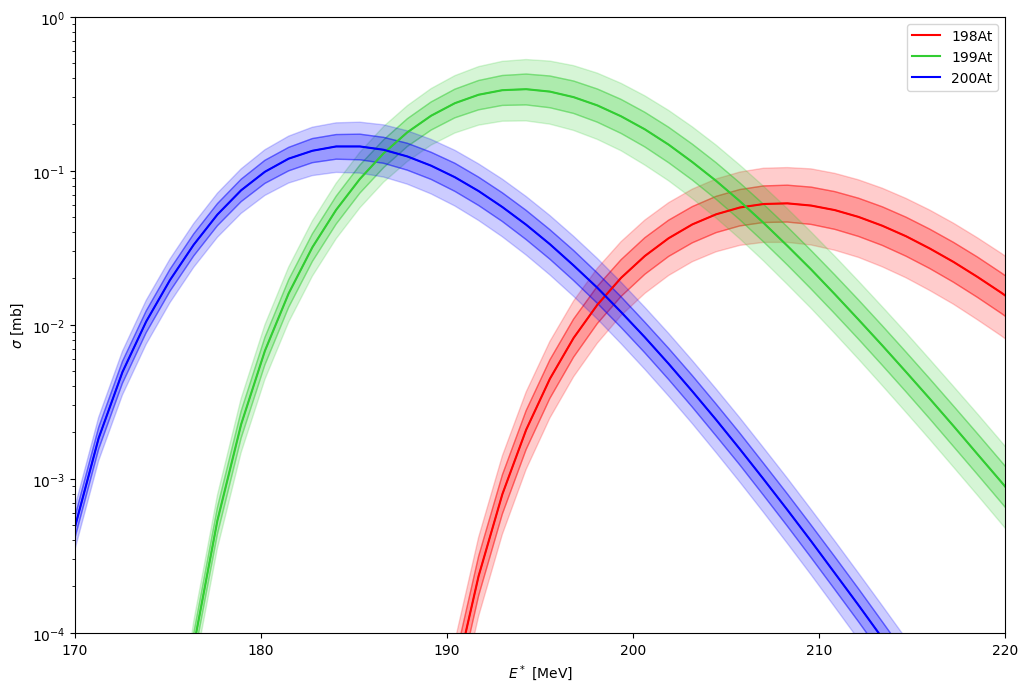

In [42]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta']
sns.color_palette("dark")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm69[dfm69['isotope'].isin(list(df_69.columns[3:-3]))], palette=colors)
plt.semilogy()
plt.ylim(1e-4, 1e0)
# plt.xlim(right=50)
# plt.xlim(20, 80)
plt.xlim(170, 220)
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

for i in range(3, len(df_69.columns)-3):
    plt.fill_between(df_69.iloc[:, 0],  df_69.iloc[:, i], df_70.iloc[:, i], color=colors[i-3], alpha=0.4)
    plt.fill_between(df_69.iloc[:, 0],  df_69.iloc[:, i], df_68.iloc[:, i], color=colors[i-3], alpha=0.4)
    plt.fill_between(df_69.iloc[:, 0],  df_70.iloc[:, i], df_71.iloc[:, i], color=colors[i-3], alpha=0.2)
    plt.fill_between(df_69.iloc[:, 0],  df_68.iloc[:, i], df_67.iloc[:, i], color=colors[i-3], alpha=0.2)